In [1]:
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

def remove_empty_lines(filename):
    """Overwrite the file, removing empty lines and lines that contain only whitespace."""
    with open(filename, 'r+') as f:
        lines = f.readlines()
        f.seek(0)
        f.writelines(line for line in lines if line.strip())
        f.truncate()

In [2]:
import re
import pprint
import os
import random
import nltk
import yaml
import collections

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from nltk import FreqDist
from nltk.collocations import *
from nltk.metrics import ConfusionMatrix

from collections import defaultdict
from collections import Counter

In [3]:
import nltk
from nltk.corpus import sentence_polarity
from nltk.tokenize import word_tokenize
from nltk.tokenize.moses import MosesDetokenizer
import random

In [58]:
sentences = sentence_polarity.sents()
len(sentences)
type(sentences)
sentence_polarity.categories()
documents = [(sent, cat) for cat in sentence_polarity.categories() 
	for sent in sentence_polarity.sents(categories=cat)]
documents[0]
detokenizer = MosesDetokenizer()
random.shuffle(documents)
all_words_list = [word for (sent,cat) in documents for word in sent]
all_words = nltk.FreqDist(all_words_list)
word_items = all_words.most_common(5000)
word_features = [word for (word, freq) in word_items]
featuresets = [(document_features(d,word_features), c) for (d,c) in documents]
train_set, test_set = featuresets[1000:], featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

list_of_lists = [list(elem) for elem in documents]

In [60]:
test = "worst"
if test in all_words_list:
    print("yes")

yes


In [69]:
dp = []
for i in range(len(documents)):
	doc_t = []
	doc_t.append(detokenizer.detokenize(documents[i][0], return_str=True))
	t = list_of_lists[i][1]
	doc_t.append(t)
	dp.append(doc_t)



dp = [tuple(l) for l in dp]

In [71]:
train = dp
print(len(dp))


all_words = set(word.lower() for passage in train for word in word_tokenize(passage[0]))
print(len(all_words_t))

all_words_t = nltk.FreqDist(all_words)
word_it = all_words_t.most_common(2000)
word_fe = [word for (word,freq) in word_it]

10662
20411


In [73]:
test = "bad"
if test in all_words:
    print("yes")

yes


In [74]:
t = [({word: (word in word_tokenize(x[0])) for word in word_fe}, x[1]) for x in train]

classifier = nltk.NaiveBayesClassifier.train(t)

In [75]:
len(word_fe)

2000

In [104]:
len(all_words)

20411

In [81]:
sentence = "I don't think I will order anymore of these cheap rings. 3 of them now have turned my fingers black."

In [77]:
test_sentence = "Keens are great, but very pricey.  These were so adorable and I was going to buy them from our neighborhood shoe store, but they didn't have my daughter's size (10) and didn't even offer to order them for me, so I went online and found them here for less money, free shipping and in the right size.  Hard to argue with that.  My daughter really likes them, but I am surprised that she doesn't wear them everyday (she usually does that with new shoes for several weeks).  I've tried asking if they hurt or anything is wrong with them, but she says no, so I'll stick with 4 stars and put it up to a fickle child with too many shoes ;-)."

In [82]:
test_sent_features = {word.lower(): (word in word_tokenize(sentence.lower())) for word in all_words}


In [83]:
test_sent_features

{'boiler': False,
 'truth-telling': False,
 'advert': False,
 'frames': False,
 'assignment': False,
 'possibility': False,
 'jean-luc': False,
 'mush': False,
 'redneck-versus-blueblood': False,
 'spoken': False,
 'compared': False,
 'quick': False,
 'dahmer': False,
 'aspires': False,
 'robotically': False,
 'what-if': False,
 'singularly': False,
 'party': False,
 'shouted': False,
 'restatement': False,
 'grows': False,
 'acute': False,
 'ladrón': False,
 'befuddlement': False,
 'ihops': False,
 'desarrollarse': False,
 'monstrously': False,
 "n't": True,
 'pausado': False,
 'peace-and-love': False,
 'tuneless': False,
 'flatulence': False,
 'wash': False,
 'circumstantial': False,
 'converts': False,
 'dwell': False,
 'overstated': False,
 "'the": False,
 'pandering': False,
 'zap': False,
 'janice': False,
 'platonic': False,
 'wavers': False,
 "'even": False,
 "that'alabama": False,
 'daddy': False,
 'sinais': False,
 'sixth-grade': False,
 'asia': False,
 'stupidity': False,
 '

In [84]:
classifier.classify(test_sent_features)

'neg'

In [85]:
pos = []
neg = []


In [86]:
remove_empty_lines('/Users/rishi/Desktop/clothing_shoes_jewelry.txt')

In [271]:
f = open('/Users/rishi/Desktop/test-pos-09.txt','w+')

In [253]:
import csv

In [120]:
fcsv = open('returns-pos.csv', 'wb')
writerf = csv.writer(fcsv)

In [121]:
fncsv = open('returns-neg.csv', 'wb')
writerfn = csv.writer(fncsv)

In [272]:
fn = open('/Users/rishi/Desktop/test-neg-09.txt','w+')

In [90]:
f = open('/Users/rishi/Desktop/clothing_shoes_jewelry.txt', 'r')
answer = collections.defaultdict(list)
for line in f:
    k, v = line.strip().split(':',1)
    
    answer[k.strip()].append(v.strip())
f.close()
cnt=0

In [91]:
print(len(answer['reviewText']))

phrasedata=[]
for n in answer['reviewText']:
	phrasedata.append([])
	phrasedata[cnt].append(n)
	cnt += 1

278677


In [92]:
cnt=0
timeyear = []
for nt in answer['reviewTime']:
	  timeyear.append(nt)
	#phrasedata[cnt].append(nt)
    #cnt += 1
print(len(timeyear))
year_list = []
for n in timeyear:
  year=re.findall('[1-2][0-9][0-9][0-9]',n)
  year_list.append(year)

print(len(year_list))
dic1=defaultdict(list)
flat_list = [item for sublist in year_list for item in sublist]
print("flat")
print (len(flat_list))
for n in flat_list:
  dic1[n].append(phrasedata[cnt])
  cnt += 1


278677
278677
flat
278677


In [93]:
len(dic1)

12

In [98]:
sam = dic1['2010']

In [263]:
sam09 = dic1['2009']

In [264]:
len(sam09)

1661

In [265]:
type(sam09)

list

In [266]:
sam09[0]

['My 2.5 year old got the 3-4 year suit. It\'s a little tight to begin with, so he fit in it just fine. The pants were a little longer, but with shoes, he fit it, no problem. (He is "average" height and weight, for a 2.5 year old, according to docs.)  If your child is "meaty" at all like mine is on top, I would suggest getting the larger size.After reading the other reviews about how flimsy this costume was, I didn\'t let my kiddo wear it until the actual day of Halloween. He ran around a lot but it didn\'t tear at all. I think it has a couple more good uses in it.If you are hoping to buy a costume that will last and will allow your child to play in it at home, I don\'t think this is the one. They have the $50 one that looks a lot more sturdier. But if it\'s just for this Halloween and maybe next year for the kiddo next door, then by all means, get this one!!!  For the price we paid ($35), I am very happy with the purchase and the pictures of him enjoying being the Heroic "Buzz" will l

In [99]:
type(sam)

list

In [110]:
len(sam[0])

1

In [103]:
sam[0][0]

"The first question was which computers to install this program - Rosetta Stone has a two seat minimum. I ended up putting the 2nd installation on a laptop, expecting to use the program in other locations.  However, Rosetta Stone's immersion method feels too intensive to me for use in most places away from home.  Installation was easy enough even though the program got stuck a couple of times along the way. The gear, headset with microphone, is sufficient.Pros:* For total immersion-type instruction without the benefit of communicating with other people, this seemed very good.* The voice recognition software is impressive. I was able to immediately begin speaking and progressed to the second level of difficulty fairly quickly. There are plenty of exercises and repetition, and this will surely help in many ways including pronunciation.* There are learning sessions in this software to allow speaking with native French speakers.*For me as an individual, this is a better way to learn than a

In [109]:
len(all_words)

20411

In [267]:
pos_09 = []

In [268]:
neg_09 = []

In [269]:
cnt=0

In [270]:
len(sam09)

1661

In [273]:
for n in sam09:
    test_sentence = n[0]
    test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
    res=classifier.classify(test_sent_features)
    if res == 'pos':
        pos_09.append(n)
        f.write(str(n))
        f.write(' '+'pos'+'\n\n')
        #writerf.writerow([n])
        #f.write(n)
    else:
        neg_09.append(n)
        fn.write(str(n))
        fn.write(' '+'neg'+'\n\n')
        #writerfn.writerow([n])
    print(cnt)
    cnt += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [274]:
len(pos_09)

974

In [275]:
len(neg_09)

687

In [283]:
pos_09[0]

['This is the type of pouch recommended by TV travel hosts. Bought one for my son for trip to France; VERY HANDY and VERY HIDDEN.RECOMMEND.']

In [125]:
len(pos)

1925

In [126]:
len(neg)

1538

In [184]:
cnt=0

In [137]:
type(pos[0])

list

In [191]:
for n in range(len(neg)):
    neg[n]= neg[n][0]

In [193]:
for n in range(len(pos)):
    pos[n]= pos[n][0]

In [192]:
neg[0]

"The first question was which computers to install this program - Rosetta Stone has a two seat minimum. I ended up putting the 2nd installation on a laptop, expecting to use the program in other locations.  However, Rosetta Stone's immersion method feels too intensive to me for use in most places away from home.  Installation was easy enough even though the program got stuck a couple of times along the way. The gear, headset with microphone, is sufficient.Pros:* For total immersion-type instruction without the benefit of communicating with other people, this seemed very good.* The voice recognition software is impressive. I was able to immediately begin speaking and progressed to the second level of difficulty fairly quickly. There are plenty of exercises and repetition, and this will surely help in many ways including pronunciation.* There are learning sessions in this software to allow speaking with native French speakers.*For me as an individual, this is a better way to learn than a

In [194]:
pos[0]

'I really enjoy the Rosetta Stone software; it\'s easy and fun to use.  The Rosetta Stone "dynamic immersion" method is different than traditional methods where you see a word in English and then see a word in the new language to memorize.  L\'&eacute;tude du franais est r&eacute;ellement amusement et facile!'

In [185]:
new_neg =[]

In [176]:
new_pos = []

In [186]:
for n in range(len(neg)):
    new_neg.append([])
    new_neg[cnt].append(neg[n][0])
    cnt += 1

In [187]:
new_neg[0]

["The first question was which computers to install this program - Rosetta Stone has a two seat minimum. I ended up putting the 2nd installation on a laptop, expecting to use the program in other locations.  However, Rosetta Stone's immersion method feels too intensive to me for use in most places away from home.  Installation was easy enough even though the program got stuck a couple of times along the way. The gear, headset with microphone, is sufficient.Pros:* For total immersion-type instruction without the benefit of communicating with other people, this seemed very good.* The voice recognition software is impressive. I was able to immediately begin speaking and progressed to the second level of difficulty fairly quickly. There are plenty of exercises and repetition, and this will surely help in many ways including pronunciation.* There are learning sessions in this software to allow speaking with native French speakers.*For me as an individual, this is a better way to learn than 

In [188]:
for n in range(len(new_neg)):
    new_neg[n].append(-1)

In [284]:
for n in range(len(neg_09)):
    neg_09[n].append(-1)

In [285]:
for n in range(len(pos_09)):
    pos_09[n].append(1)

In [287]:
pos_09[0]

['This is the type of pouch recommended by TV travel hosts. Bought one for my son for trip to France; VERY HANDY and VERY HIDDEN.RECOMMEND.',
 1]

In [177]:
for n in range(len(pos)):
    new_pos.append([])
    new_pos[cnt].append(pos[n][0])
    cnt += 1

In [178]:
new_pos[0]

['I really enjoy the Rosetta Stone software; it\'s easy and fun to use.  The Rosetta Stone "dynamic immersion" method is different than traditional methods where you see a word in English and then see a word in the new language to memorize.  L\'&eacute;tude du franais est r&eacute;ellement amusement et facile!']

In [179]:
for n in range(len(new_pos)):
    new_pos[n].append(1)

In [181]:
new_pos[10]

['What a releif this bra is for me.  I can run, jump rope, and perform other aerobic athletic activities without a hint of a jiggle!  This is a muist have for the active well-endowed!',
 1]

In [195]:
Main_Data = new_pos + new_neg

In [288]:
Main_Data_09 = pos_09 + neg_09

In [296]:
Mix_Main_Data = new_pos + new_neg + pos_09 + neg_09

In [301]:
pos_sen = new_pos + pos_09

In [302]:
neg_sen = new_neg + neg_09

In [297]:
len(Mix_Main_Data)

5124

In [289]:
len(Main_Data_09)

1661

In [197]:
random.shuffle(Main_Data)

In [290]:
random.shuffle(Main_Data_09)

In [299]:
random.shuffle(Mix_Main_Data)

In [291]:
Main_Data_09[:5]

[['These Maui Jim sunglasses are quite simply the best!  They look sharp, and the polarized lenses are ideal for boating or driving.  I took my boat out and while out in the ocean caught a fogbank.  The polarized Maui Jims really did help me to see through the fog and glare.  I never put to sea without my Maui Jims.  These are great for driving too.  Plus they just look darned sharp.  RJB.',
  1],
 ["i purchased the first pair in the gold.  i found i could walk forever in these shoes.  at 70 yrs. that is saying a lot.  so then i just bought this pair in black.  great price too.  my friends are buying them online as well.  the only problem is getting all the colors in your size but everyone is patient.  i think the next might be brown or beige or white.  i am going to take them with me when going on a trip. they are easy to remove at the airport going to security which is a problem with some shoes at my age.  love them.  i shouldn't write this because everyone will buy the shoes.  that'

In [292]:
with open('/Users/rishi/Desktop/data_pos_sen_09.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['pos','sentiment'])
    for val in pos_09:
        writer.writerow([val[0],val[1]])

In [295]:
with open('/Users/rishi/Desktop/data_neg_sen_09.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['neg','sentiment'])
    for val in neg_09:
        writer.writerow([val[0],val[1]])

In [294]:
with open('/Users/rishi/Desktop/Main_Data_sen_09.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['phrase','sentiment'])
    for val in Main_Data_09:
        writer.writerow([val[0],val[1]])

In [300]:
with open('/Users/rishi/Desktop/Main_Data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['phrase','sentiment'])
    for val in Mix_Main_Data:
        writer.writerow([val[0],val[1]])

In [165]:
neg[0][0]

"The first question was which computers to install this program - Rosetta Stone has a two seat minimum. I ended up putting the 2nd installation on a laptop, expecting to use the program in other locations.  However, Rosetta Stone's immersion method feels too intensive to me for use in most places away from home.  Installation was easy enough even though the program got stuck a couple of times along the way. The gear, headset with microphone, is sufficient.Pros:* For total immersion-type instruction without the benefit of communicating with other people, this seemed very good.* The voice recognition software is impressive. I was able to immediately begin speaking and progressed to the second level of difficulty fairly quickly. There are plenty of exercises and repetition, and this will surely help in many ways including pronunciation.* There are learning sessions in this software to allow speaking with native French speakers.*For me as an individual, this is a better way to learn than a

In [152]:
mod_pos = pos

In [157]:
mod_neg = neg

In [154]:
for n in range(len(mod_pos)):
    mod_pos[n].append(1)

In [141]:
cnt = 0

In [148]:
len(mod_neg)

1538

In [214]:
f = open('/Users/rishi/Desktop/NLP_HW4 Files/Year 2010/Main_Data_sen.csv', 'r')
  # loop over lines in the file and use the first limit of them
phrasedata = []
cnt = 0
for line in f:
    
    # ignore the first line starting with Phrase and read all lines
    if (not line.startswith('phrase')):
        
      # remove final end of line character
        line = line.strip()
        phrasedata.append([])
      # each line has 4 items separated by tabs
      # ignore the phrase and sentence ids, and keep the phrase and sentiment
        phrasedata[cnt].append(line.split('\t')[0])
        #phrasedata[cnt].append(line.split('\t')[1])
        cnt += 1

In [217]:
phrasedata[0][0]

'"'

In [203]:
len(phrasedata)

3463

In [ ]:
csvdic = {}

In [218]:
with open('/Users/rishi/Desktop/NLP_HW4 Files/Year 2009/Main_Data_sen_09.csv', 'r') as fin:
    csvin = csv.reader(fin)
    header = next(csvin, [])
    csvdic = dict(zip(header, zip(*csvin)))

In [233]:
csvdic['phrase'] = list(csvdic['phrase']

SyntaxError: unexpected EOF while parsing (<ipython-input-233-03118c85fe76>, line 1)

In [236]:
phrase = list(csvdic['phrase'])

In [238]:
senti = list(csvdic['sentiment'])

In [237]:
phrase[0]

"My son is enjoying this pistol quite a bit.  It's fairly heavy and seems well made.  My only negative comment at this point is that the ring caps are difficult to remove once they've been shot.  They seem to get stuck and we need to use a sharp, pointed object every time we remove the ring of caps.  The cap rings sure were overpriced!"

In [239]:
senti[0]

'1'

In [242]:
cnt = 0

In [243]:
phrasedata = []

In [244]:
for i in phrase:
    phrasedata.append([])
    phrasedata[cnt].append(i)
    phrasedata[cnt].append(senti[cnt])
    cnt += 1

In [246]:
phrasedata[0][0]

"My son is enjoying this pistol quite a bit.  It's fairly heavy and seems well made.  My only negative comment at this point is that the ring caps are difficult to remove once they've been shot.  They seem to get stuck and we need to use a sharp, pointed object every time we remove the ring of caps.  The cap rings sure were overpriced!"

In [247]:
len(phrasedata)

3463

In [276]:
len(pos)

1925

In [277]:
len(neg)

1538

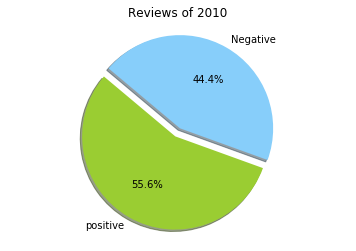

In [280]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'positive', 'Negative'
sizes = [len(pos),len(neg)]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Reviews of 2010')
 
plt.axis('equal')
plt.show()

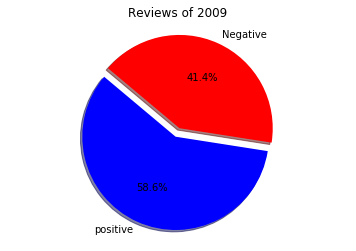

In [281]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'positive', 'Negative'
sizes = [len(pos_09),len(neg_09)]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Reviews of 2009')
 
plt.axis('equal')
plt.show()

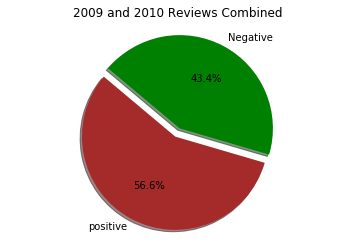

In [304]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'positive', 'Negative'
sizes = [len(pos_sen),len(neg_sen)]
colors = ['brown', 'green']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('2009 and 2010 Reviews Combined')
 
plt.axis('equal')
plt.show()